In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_exercise = pd.read_csv('data/exercises_data_final.csv')

In [5]:
data_exercise.describe()

,id
count,1474.000000
mean,736.500000
std,425.651461
min,0.000000
25%,368.250000
50%,736.500000
75%,1104.750000
max,1473.000000


In [6]:
data_exercise.columns.tolist()

['id',
 'Exercise Name',
 'Muscle Group',
 'Equipment',
 'Difficulty',
 'Exercise_Type',
 'Combined_Text',
 'Exercise_URL',
 'Video_URL',
 'description']

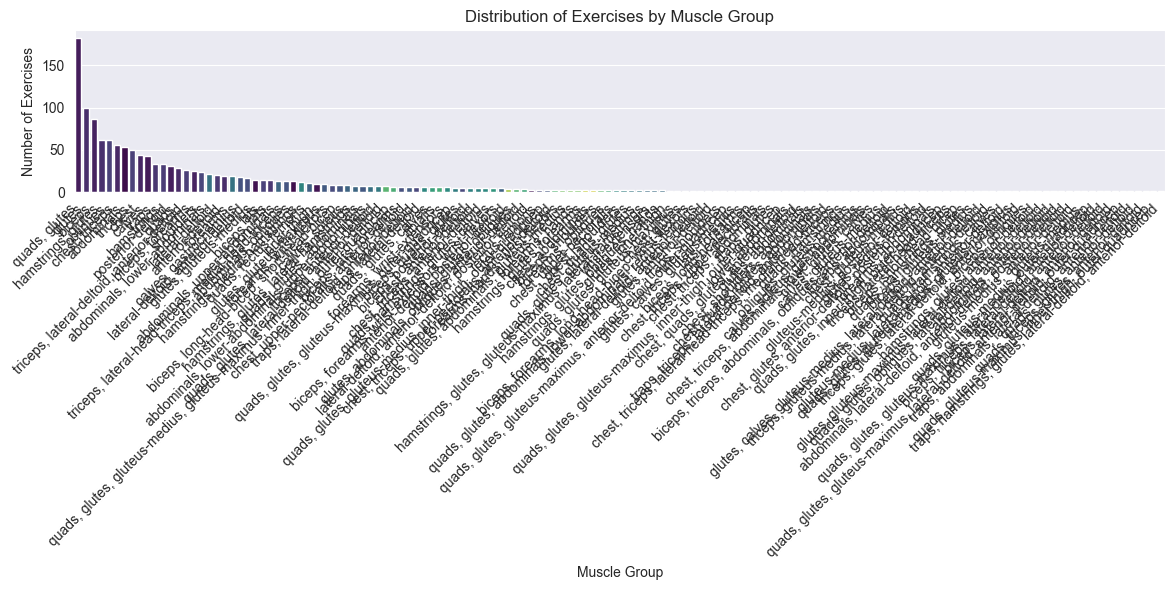

In [7]:
plt.figure(figsize=(12, 6))
# Updated line: assign 'Muscle Group' to hue and set legend=False
sns.countplot(data=data_exercise, x='Muscle Group', hue='Muscle Group', order=data_exercise['Muscle Group'].value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Exercises by Muscle Group')
plt.xlabel('Muscle Group')
plt.ylabel('Number of Exercises')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



C:\Users\johnu\AppData\Local\Temp\ipykernel_24376\772552032.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=singular_muscle_df, x='Muscle Group', y='Number of Exercises', palette='viridis')


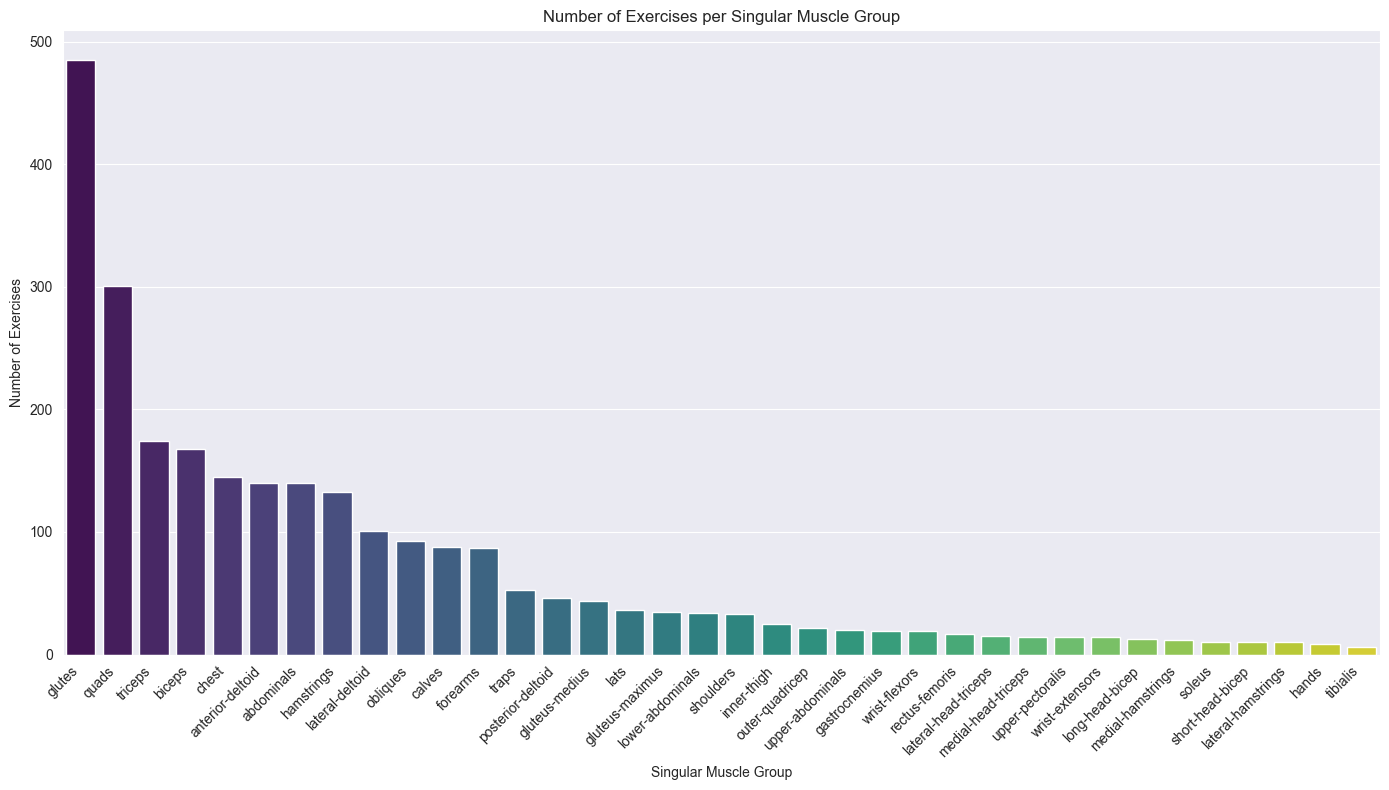

In [8]:
all_singular_muscle_groups = []

# Iterate through the 'Muscle Group' column and split combined entries
for muscle_group_entry in data_exercise['Muscle Group'].dropna(): # dropna() to handle any potential NaN values
    # Split the string by ', ' to get individual muscle groups
    # Use .strip() to remove any leading/trailing whitespace from each split part
    singular_muscles = [muscle.strip() for muscle in muscle_group_entry.split(',')]
    all_singular_muscle_groups.extend(singular_muscles)

# Create a pandas Series from the list of all singular muscle groups
singular_muscle_counts = pd.Series(all_singular_muscle_groups).value_counts()

# Create a DataFrame from the Series for easier plotting with seaborn
singular_muscle_df = singular_muscle_counts.reset_index()
singular_muscle_df.columns = ['Muscle Group', 'Number of Exercises']

plt.figure(figsize=(14, 8))
# Create a bar plot using the new DataFrame
sns.barplot(data=singular_muscle_df, x='Muscle Group', y='Number of Exercises', palette='viridis')

plt.title('Number of Exercises per Singular Muscle Group')
plt.xlabel('Singular Muscle Group')
plt.ylabel('Number of Exercises')
plt.xticks(rotation=45, ha='right') # Rotate labels if muscle group names are long
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

C:\Users\johnu\AppData\Local\Temp\ipykernel_24376\1759956765.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=broad_category_df, x='Broad Muscle Group', y='Number of Exercises', palette='viridis',


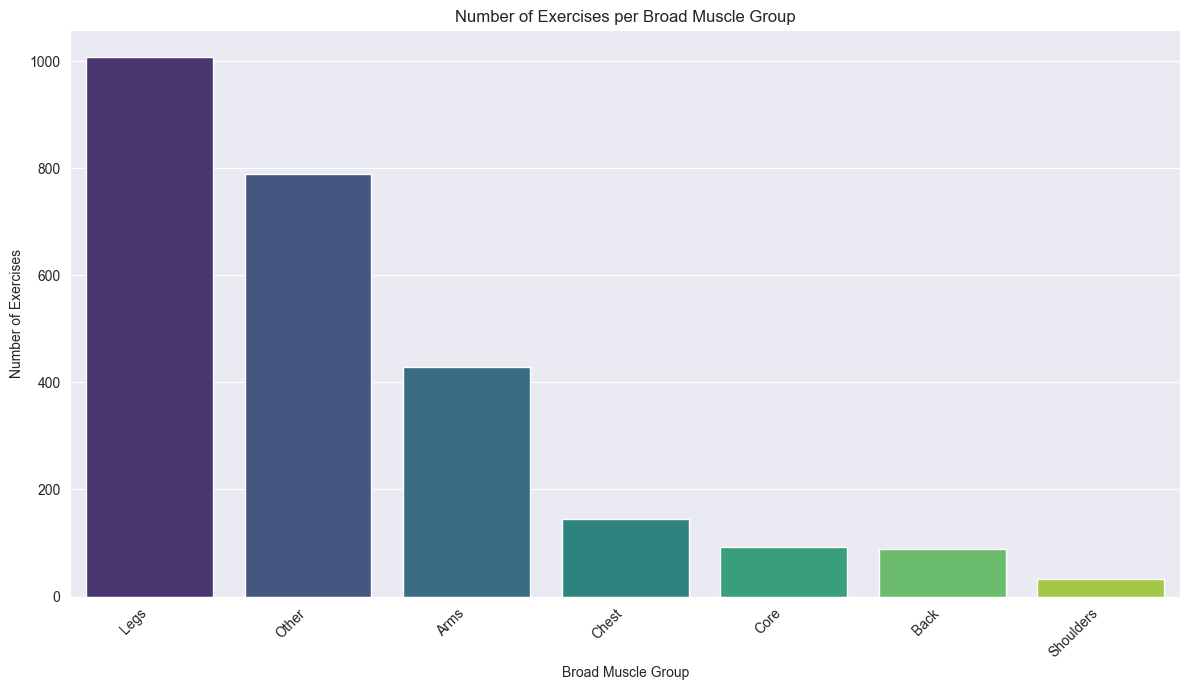

In [9]:
all_singular_muscle_groups = []
for muscle_group_entry in data_exercise['Muscle Group'].dropna():
    singular_muscles = [muscle.strip() for muscle in muscle_group_entry.split(',')]
    all_singular_muscle_groups.extend(singular_muscles)

# Define a mapping from specific singular muscles to broader categories
# This mapping needs to be comprehensive based on your dataset's muscle group names
broad_muscle_group_mapping = {
    'Legs': ['quads', 'glutes', 'hamstrings', 'calves', 'adductors', 'abductors', 'thighs'],
    'Arms': ['biceps', 'triceps', 'forearms'],
    'Chest': ['pectorals', 'chest'],
    'Back': ['lats', 'traps', 'lower back', 'middle back', 'upper back', 'erector spinae'],
    'Shoulders': ['deltoids', 'shoulders'],
    'Core': ['abs', 'obliques', 'core'],
    'Full Body': ['full body'], # If 'full body' explicitly appears
    'Other': [] # For any muscles not explicitly mapped
}

# Invert the mapping for easier lookup: singular muscle -> broad category
singular_to_broad_map = {}
for broad_category, singular_muscles in broad_muscle_group_mapping.items():
    for muscle in singular_muscles:
        singular_to_broad_map[muscle.lower()] = broad_category # Use .lower() for case-insensitive matching

# Map the extracted singular muscle groups to their broader categories
broad_categorized_muscles = []
for singular_muscle in all_singular_muscle_groups:
    # Use .lower() for matching
    mapped_category = singular_to_broad_map.get(singular_muscle.lower(), 'Other')
    broad_categorized_muscles.append(mapped_category)

# Get counts for the broader categories
broad_category_counts = pd.Series(broad_categorized_muscles).value_counts()

# Create a DataFrame from the Series for easier plotting with seaborn
broad_category_df = broad_category_counts.reset_index()
broad_category_df.columns = ['Broad Muscle Group', 'Number of Exercises']

plt.figure(figsize=(12, 7))
sns.barplot(data=broad_category_df, x='Broad Muscle Group', y='Number of Exercises', palette='viridis',
            order=broad_category_df.sort_values(by='Number of Exercises', ascending=False)['Broad Muscle Group'])

plt.title('Number of Exercises per Broad Muscle Group')
plt.xlabel('Broad Muscle Group')
plt.ylabel('Number of Exercises')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

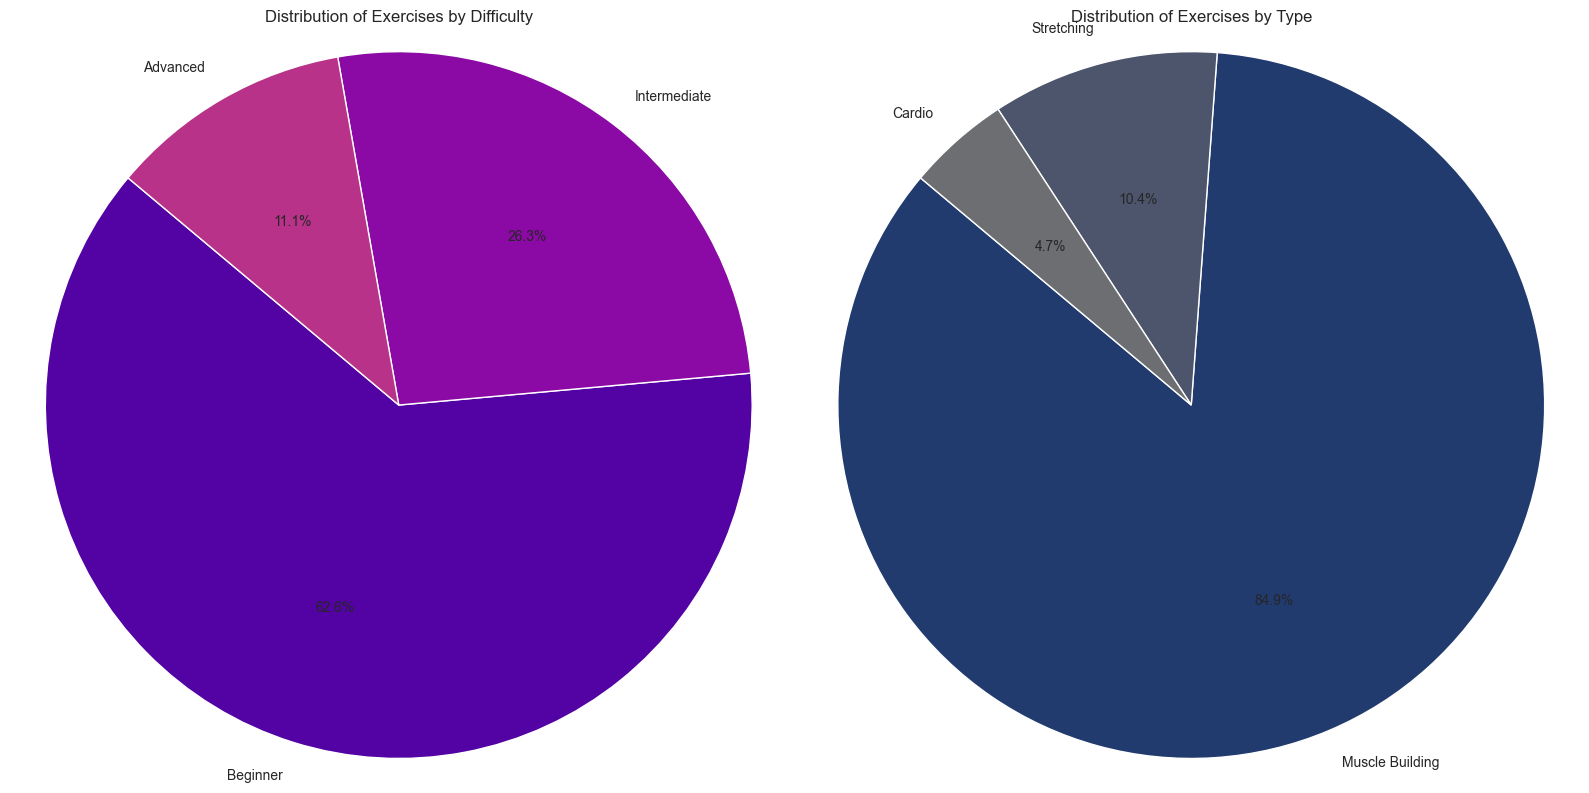

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) # Adjusted figure size for better readability

# Pie chart for 'Difficulty' on the first subplot
difficulty_counts = data_exercise['Difficulty'].value_counts()
axes[0].pie(difficulty_counts, labels=difficulty_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma'))
axes[0].set_title('Distribution of Exercises by Difficulty')
axes[0].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# Pie chart for 'Exercise Type' on the second subplot
exercise_type_counts = data_exercise['Exercise_Type'].value_counts()
axes[1].pie(exercise_type_counts, labels=exercise_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('cividis'))
axes[1].set_title('Distribution of Exercises by Type')
axes[1].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout() # Adjust layout to prevent labels from overlapping

plt.show()

C:\Users\johnu\AppData\Local\Temp\ipykernel_24376\3989837062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_exercise, x='Equipment', palette='viridis', order=data_exercise['Equipment'].value_counts().index)


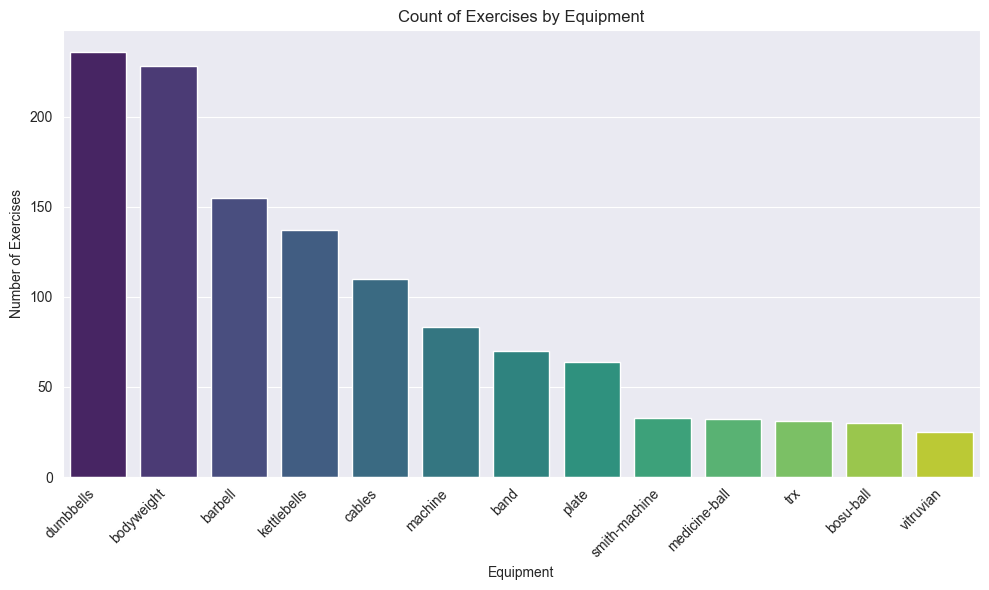

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_exercise, x='Equipment', palette='viridis', order=data_exercise['Equipment'].value_counts().index)
plt.title('Count of Exercises by Equipment')
plt.xlabel('Equipment')
plt.ylabel('Number of Exercises')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

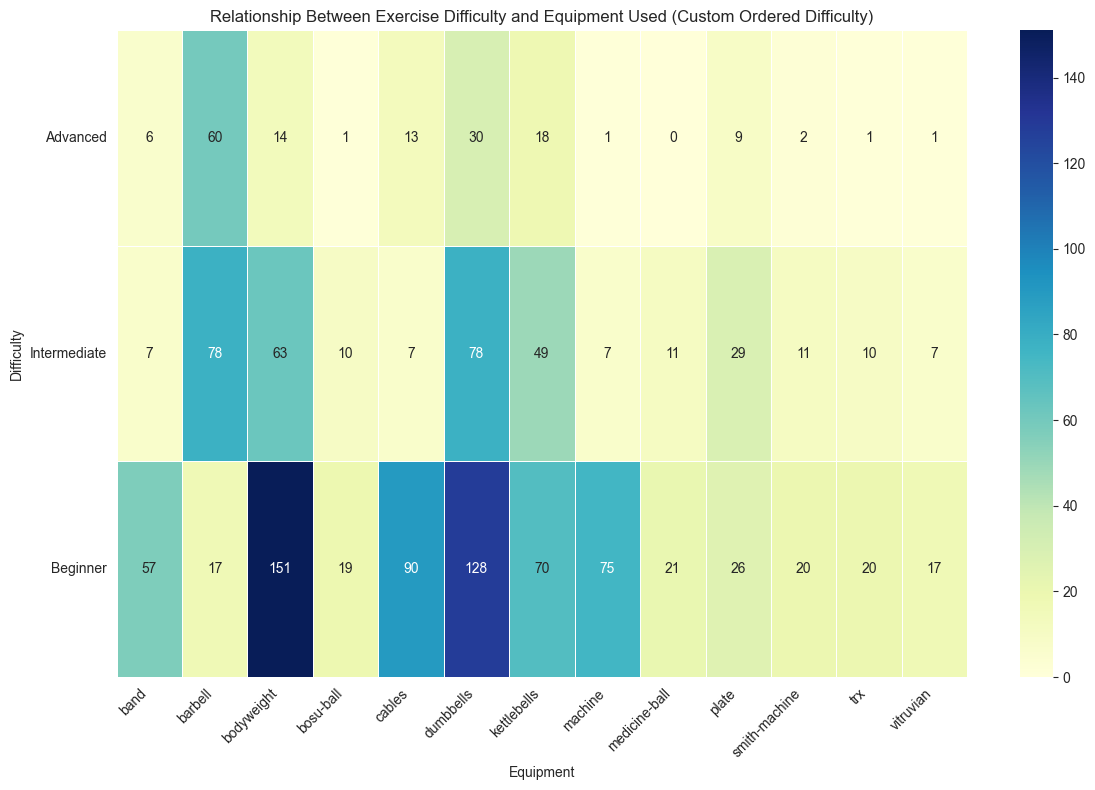

In [12]:
difficulty_order = ['Advanced','Intermediate', 'Beginner']

# Convert 'Difficulty' column to a categorical type with the specified order
# This ensures that 'Difficulty' levels are sorted correctly in the cross-tabulation and heatmap
data_exercise['Difficulty'] = pd.Categorical(data_exercise['Difficulty'], categories=difficulty_order, ordered=True)

# Create a cross-tabulation (contingency table) between 'Difficulty' and 'Equipment'
# The rows (Difficulty) will now be sorted according to the updated 'difficulty_order'
contingency_table = pd.crosstab(data_exercise['Difficulty'], data_exercise['Equipment'])

# Visualize the contingency table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Relationship Between Exercise Difficulty and Equipment Used (Custom Ordered Difficulty)')
plt.xlabel('Equipment')
plt.ylabel('Difficulty')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()